## ADVANCED REGRESSION ASSIGNMENT

#### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

a. Which variables are significant in predicting the price of a house, and

b. How well those variables describe the price of a house.

### STEP 1: READING AND UNDERSTANDING THE DATA

In [469]:
#Importing all the required libraries

import warnings
warnings.filterwarnings("ignore")

from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
pd.set_option('display.max_columns', 500)
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score

In [470]:
#Reading the file into a dataframe
housing_df=pd.read_csv("train.csv")

#Looking at the top 5 rows of the dataframe
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [471]:
#Checking the number of rows and columns in the dataframe
housing_df.shape

(1460, 81)

In [472]:
#Obtaining concise summary about the Dataframe
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [473]:
#Getting metrics about the data
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [474]:
#We will check to see if any rows are duplicated
sum(housing_df.duplicated(subset = 'Id'))

0

In [475]:
#Checking the datatypes
housing_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


### STEP 2: DATA CLEANING AND PREPARATION

In [476]:
# Checking number of null values in columns which have null values
housing_df.loc[:, housing_df.isnull().any()].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [477]:
# Checking the percentage of null values for the above columns 
print(round(100*(housing_df.loc[:, housing_df.isnull().any()].isnull().sum())/len(housing_df.index), 2))

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64


#### We will drop "Alley", "PoolQC", "Fence" and "MiscFeature" as they have a high percentage of null values (i.e greater than 80%). Although here, from the data dictionary we  can understand that the null values have significance as Null in "Alley" means No Alley, in "PoolQC" means No Pool, in "Fence" means no fence and in "MiscFeature" means none. However, even if we impute it these columns will show no variance and hence we will drop them directly.

In [478]:
#Checking for unique values in "Alley" column
housing_df['Alley'].value_counts(dropna=False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [479]:
#Checking for unique values in "PoolQC" column
housing_df['PoolQC'].value_counts(dropna=False)

NaN    1453
Gd        3
Fa        2
Ex        2
Name: PoolQC, dtype: int64

In [480]:
#Checking for unique values in "Fence" column
housing_df['Fence'].value_counts(dropna=False)

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [481]:
#Checking for unique values in "MiscFeature" column
housing_df['MiscFeature'].value_counts(dropna=False)

NaN     1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [482]:
#Dropping the columns with null values greater than 80%.
housing_df=housing_df.drop(["Alley","PoolQC","Fence","MiscFeature"],axis=1)

#checking the shape after dropping the columns
housing_df.shape

(1460, 77)

In [483]:
#Filling the null values in "LotFrontage" column with the median values.
housing_df['LotFrontage'] = housing_df['LotFrontage'].fillna(housing_df['LotFrontage'].median())

In [484]:
# Looking at the unique values in 'MasVnrType' column
housing_df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [485]:
# Checking the values in "MasVnrType" column corresponding to null values in "MasVnrArea" column 
housing_df.loc[housing_df.MasVnrArea.isnull(), ['MasVnrArea','MasVnrType']]

,MasVnrArea,MasVnrType
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [486]:
#checking the values in "MasVnrArea" corresponding the "None" values in "MasVnrType" column
housing_df.loc[housing_df.MasVnrType == 'None', ['MasVnrArea','MasVnrType']].head()

,MasVnrArea,MasVnrType
1,0.0,None
3,0.0,None
5,0.0,None
8,0.0,None
9,0.0,None


#### We can see that the null values are probably "None" which indicates that there is no Masonry veneer and hence the corresponding area is also zero. Thus , we will fill the null values in "MasVnrType" column with none and "MasVnrArea" column as 0.

In [487]:
#Imputing the null values in "MasVnrType" with "None".
housing_df['MasVnrType'].fillna('None',inplace=True)

In [488]:
#Imputing the "MasVnrArea" column with 0.
housing_df['MasVnrArea'].fillna(0,inplace=True)

In [489]:
# Looking at the unique values in 'Electrical' column
housing_df['Electrical'].value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [490]:
#Replacing the null values in the "Electrical" column with the mode which is Standard Circuit Breakers & Romex(SBrkr)
housing_df['Electrical'].fillna('SBrkr',inplace=True)

In [491]:
# Looking at the unique values in 'FireplaceQu' column
housing_df['FireplaceQu'].value_counts(dropna=False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [492]:
# Checking the values in "Fireplaces" column corresponding to the null values in "FireplaceQu" column
housing_df.loc[housing_df['FireplaceQu'].isnull(),['Fireplaces','FireplaceQu']].head(10)

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
17,0,NaN
18,0,NaN
19,0,NaN
26,0,NaN
29,0,NaN


#### From above we can see that Fireplace Quality is null because fireplace is not present (value is 0). From the data dictionary we can see that No Fireplace is indicated by "NA". Hence, we will impute the null values with "NA".

In [493]:
#Replacing the null values in the "FireplaceQu" column with "NA"
housing_df['FireplaceQu'].fillna('NA',inplace=True)

In [494]:
# Looking at the unique values in 'GarageType' column
housing_df['GarageType'].value_counts(dropna=False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [495]:
# Filling the null values in BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 as "NA"
housing_df.loc[housing_df.BsmtQual.isnull() , ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]="NA"

#### We have imputed all null values in "Bsmtcond","BsmtExposure","BsmtFinType1","BsmtFinType2" columns corresponding to the null values in "BsmtQual" as NA which indicates that there is "No Basement" as per the data dictionary.

In [496]:
#Checking unique values in "BsmtCond" column
housing_df['BsmtCond'].value_counts(dropna=False)

TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64

In [497]:
#Checking for unique values in "BsmtExposure" column
housing_df['BsmtExposure'].value_counts(dropna=False)

No     953
Av     221
Gd     134
Mn     114
NA      37
NaN      1
Name: BsmtExposure, dtype: int64

#### We can see that there is still one null value in "BsmtExposure" column. We know that this row has a basement and hence cannot be imputed with "NA". We will thus impute it with the mode of this column which is "No".

In [498]:
#Replacing the null value in the "BsmtExposure" column with the mode "No"
housing_df['BsmtExposure'].fillna('No',inplace=True)

In [499]:
#Checking unique values in "BsmtFinType1" column
housing_df['BsmtFinType1'].value_counts(dropna=False)

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64

In [500]:
#Checking unique values in "BsmtFinType2" column
housing_df['BsmtFinType2'].value_counts(dropna=False)

Unf    1256
Rec      54
LwQ      46
NA       37
BLQ      33
ALQ      19
GLQ      14
NaN       1
Name: BsmtFinType2, dtype: int64

#### We can see that there is still one null value in "BsmtFinType2" column. We cannot impute this with "NA" as we know this row has a basement. We will check for the corresponding values in other related columns in order to impute.


In [501]:
#Checking for values in other columns corresponding to the null value in "BsmtFinType2" column
housing_df.loc[housing_df.BsmtFinType2.isnull(),['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2
332,Gd,TA,No,GLQ,1124,NaN,479


In [502]:
#Checking for average values in "BsmtFinSF2" column for categories in "BsmtFinType2" column
housing_df.loc[:,['BsmtFinType2','BsmtFinSF2']].groupby(by='BsmtFinType2').mean()

,BsmtFinSF2
BsmtFinType2,
ALQ,626.157895
BLQ,329.909091
GLQ,658.000000
LwQ,310.739130
NA,0.000000
Rec,392.462963
Unf,0.000000


#### We can see that the value in "BsmtFinSF2" column is 479 corresponding to the null value in "BsmtFinType2" column. From the above table we can see that the closest average to this is 392 which indicates "Rec" (Average Rec Room) Rating of basement finished area. Thus, we will impute the null value in "BsmtFinType2" with Rec.

In [503]:
#Replacing the null value in the "BsmtFinType2" column with "Rec"
housing_df['BsmtFinType2'].fillna('Rec',inplace=True)

In [504]:
#Checking for values in Garage related columns corresponding to the null values in "GarageType" column
housing_df.loc[housing_df['GarageType'].isnull(),['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']].head(10)

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
99,NaN,NaN,NaN,0,0,NaN,NaN
108,NaN,NaN,NaN,0,0,NaN,NaN
125,NaN,NaN,NaN,0,0,NaN,NaN
127,NaN,NaN,NaN,0,0,NaN,NaN
140,NaN,NaN,NaN,0,0,NaN,NaN


#### Since the values are null for all garage related columns, we can conclude that there is no garage. Hence, we will impute "GarageType", "GarageFinish", "GarageQual", "GarageCond" with NA indicating no garage as per the data dictionary.

In [505]:
#Imputing null values in the above columns with "NA"
housing_df.loc[housing_df.GarageType.isnull() , ['GarageType','GarageFinish','GarageQual','GarageCond']] = 'NA'

In [506]:
#Checking for values corresponding to null values in "GarageYrBlt" column
housing_df.loc[housing_df.GarageYrBlt.isnull(),['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']].head(10)

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NA,NaN,NA,0,0,NA,NA
48,NA,NaN,NA,0,0,NA,NA
78,NA,NaN,NA,0,0,NA,NA
88,NA,NaN,NA,0,0,NA,NA
89,NA,NaN,NA,0,0,NA,NA
99,NA,NaN,NA,0,0,NA,NA
108,NA,NaN,NA,0,0,NA,NA
125,NA,NaN,NA,0,0,NA,NA
127,NA,NaN,NA,0,0,NA,NA
140,NA,NaN,NA,0,0,NA,NA


#### We can see that there is no garage and hence there are null values in the Garage Year built column. We will impute it with the current year such that the age is 0.

In [507]:
# Imputing the null values with 2019
housing_df["GarageYrBlt"].fillna(2019, inplace=True)

In [508]:
#Checking for any null values after imputing in all columns
print(round(100*(housing_df.loc[:, housing_df.isnull().any()].isnull().sum())/len(housing_df.index), 2))

Series([], dtype: float64)


#### We can see that there are no null values remaining and all have been treated.

In [509]:
#Storing the current year in a variable
today = str(datetime.date.today())
CurrentYear = int(today[:4])
CurrentYear

2019

##### Feature Engineering

In [510]:
#converting "YearRemodAdd" variable into the number of years since the property was remodelled.
housing_df['Years_since_remod'] = CurrentYear - housing_df['YearRemodAdd']

#converting "YearBuilt" column in the age of the property.
housing_df['Age'] = CurrentYear - housing_df['YearBuilt']

#Converting "GarageYrBlt" column into age of the garage where 0 happens to be the abscence of a garage.
housing_df['Garage_Age']= CurrentYear - housing_df['GarageYrBlt']

#Converting "YrSold" and "Mosold" into the number of years since the property was sold
housing_df['Years_sincesold'] =  round(((CurrentYear - housing_df['YrSold']) + (housing_df['MoSold'])/12),1)

#Dropping original variables
housing_df = housing_df.drop(['YearRemodAdd','YearBuilt','YrSold','MoSold', 'GarageYrBlt'], 1)

In [511]:
#Storing all categorical columns in a variable
categorical_cols = housing_df.select_dtypes(include=['object'])
categorical_cols.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [512]:
#Checking the unique values in each categorical column
for i in categorical_cols:
    print(housing_df[i].value_counts(dropna=False))

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1260
Feedr       81
Artery     

#### The following variables can be dropped due to very low variance as they do not add any value to the model:

1. Street
2. Utilities
3. Condition2

In [513]:
#Dropping columns with low variance
housing_df=housing_df.drop(["Street","Utilities","Condition2"],axis=1)

#Dropping the column names with low variance from the categorical columns list
categorical_df=categorical_cols.drop(["Street","Utilities","Condition2"],axis=1)
categoricalCols = list(categorical_df.columns)
categoricalCols

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [514]:
#We will drop the "Id" column as well as it is not required for modelling
housing_df=housing_df.drop(["Id"],axis=1)

In [515]:
#Storing the numerical columns in a variable
NumericalCols = list(housing_df.select_dtypes(include=['int64','float64']).columns)
NumericalCols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice',
 'Years_since_remod',
 'Age',
 'Garage_Age',
 'Years_sincesold']

In [516]:
#Looking the top 5 rows of the dataframe again 
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,Years_since_remod,Age,Garage_Age,Years_sincesold
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,16,16,16.0,11.2
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,43,43,43.0,12.4
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,17,18,18.0,11.8
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,49,104,21.0,13.2
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,19,19,19.0,12.0


### STEP 3: EXPLORATORY DATA ANALYSIS

#### Visualising the Categorical Columns

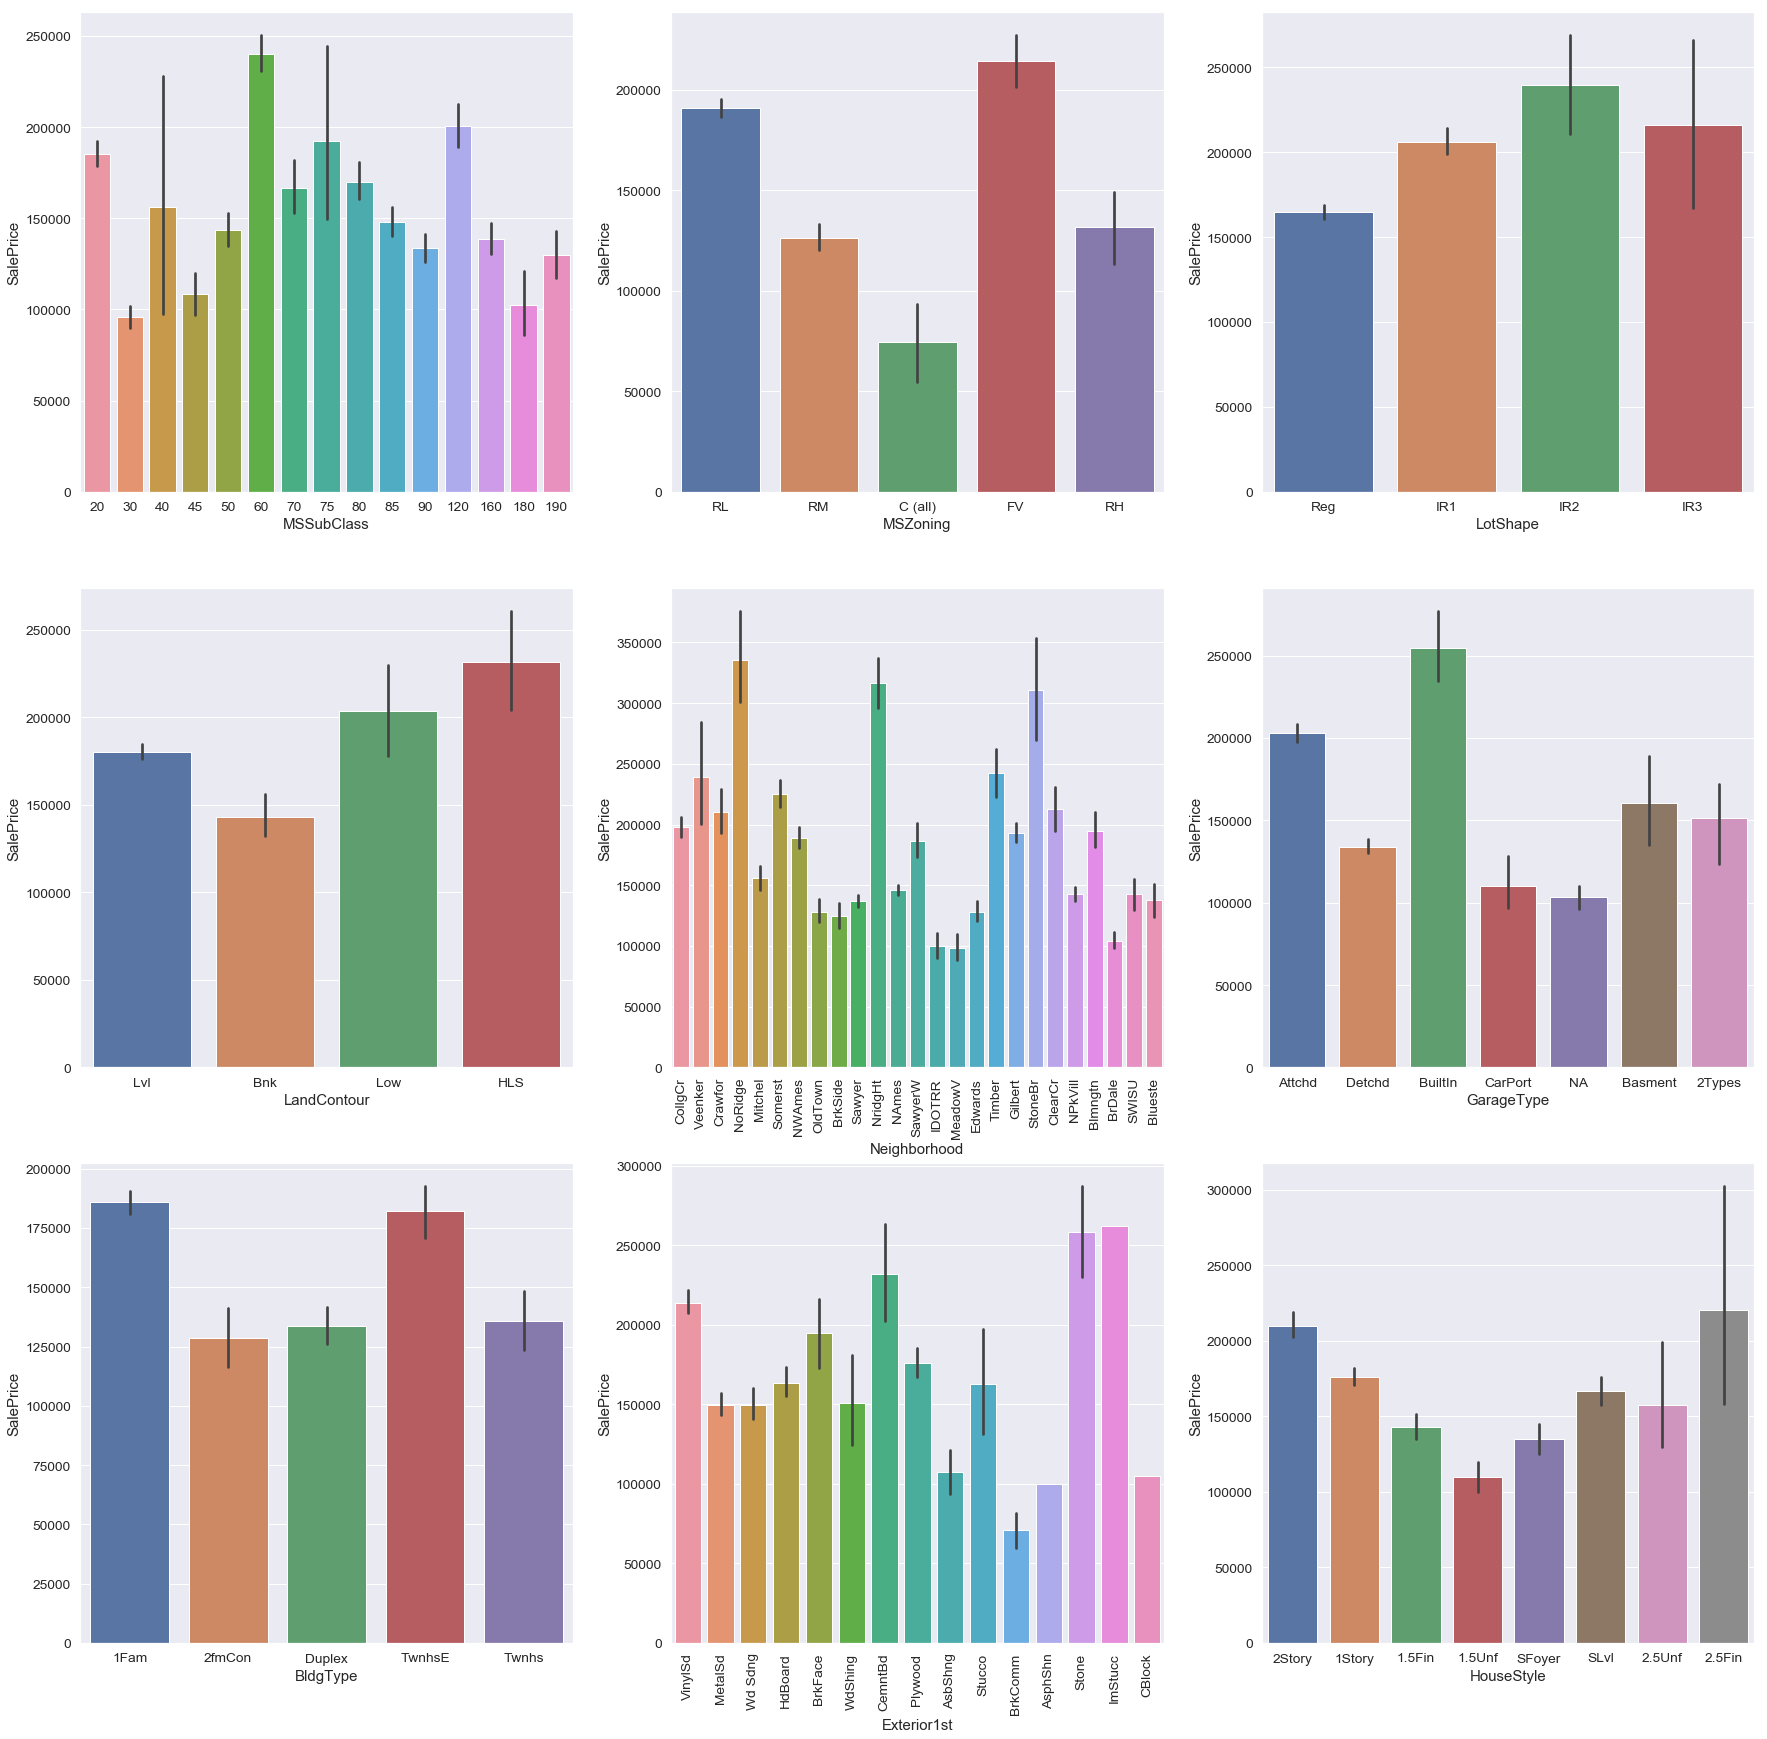

In [517]:
#Visualising the categorical variables through a barplot
plt.figure(figsize=(30, 30))

plt.subplot(3,3,1)
sns.barplot(data=housing_df,x="MSSubClass",y='SalePrice')

plt.subplot(3,3,2)
sns.barplot(data=housing_df,x="MSZoning",y='SalePrice')

plt.subplot(3,3,3)
sns.barplot(data=housing_df,x="LotShape",y='SalePrice')

plt.subplot(3,3,4)
sns.barplot(data=housing_df,x="LandContour",y='SalePrice')

plt.subplot(3,3,5)
sns.barplot(data=housing_df,x="Neighborhood",y='SalePrice')
plt.xticks(rotation=90)

plt.subplot(3,3,6)
sns.barplot(data=housing_df,x="GarageType",y='SalePrice')

plt.subplot(3,3,7)
sns.barplot(data=housing_df,x="BldgType",y='SalePrice')

plt.subplot(3,3,8)
sns.barplot(data=housing_df,x="Exterior1st",y='SalePrice')
plt.xticks(rotation=90)

plt.subplot(3,3,9)
sns.barplot(data=housing_df,x="HouseStyle",y='SalePrice')
plt.show()

#### Inference:

1. From the first graph we can see that the sale price is highest for MSSubClass 60 which is 2-STORY 1946 & NEWER and class "120" which is a 1-STORY PUD (Planned Unit Development) - 1946 & NEWER type of dwelling. It is least for class "30" which is a 1-STORY 1945 & OLDER type of dwelling. 


2. Sale Price vs MSZoning - The sale price is highest for FV (Floating Village Residential) and RL (Residential Low Density) and least for commercial.


3. Sale Price vs Lot Shape - Moderately Irregular and Irregular shape of the Lot have the highest prices.


4. Sale Price vs Land Contour - Hillside - Significant slope from side to side have the highest Sale price as compared to Near Flat/Level, Banked - Quick and significant rise from street grade to building or Depression type of Land contours.


5. Sale Price vs Neighborhood - Stone Brook, Northridge Heights, and Northridge Neighborhoods have the highest property prices.


6. Sale Price vs Garage Type - The Sale Price is highest for Built-in garages and Attached garages. The Sale price is low in the absence of a garage or car port type of a garage.<br>


7. Sale Price vs Bldg Type - Single-family Detached	and Townhouse End Unit type of dwelling have the highest sale price.


8. Sale Price vs Exterior1st -Imitation Stucco and Stone type of exterior covering on the house has the highest Sale price.


9. Sale Price vs House Style - Two and one-half story: 2nd level finished has the highest Sale price, followed by Two Story house style. One and one-half story: 2nd level unfinished has the least Sale Price as compared to the others.

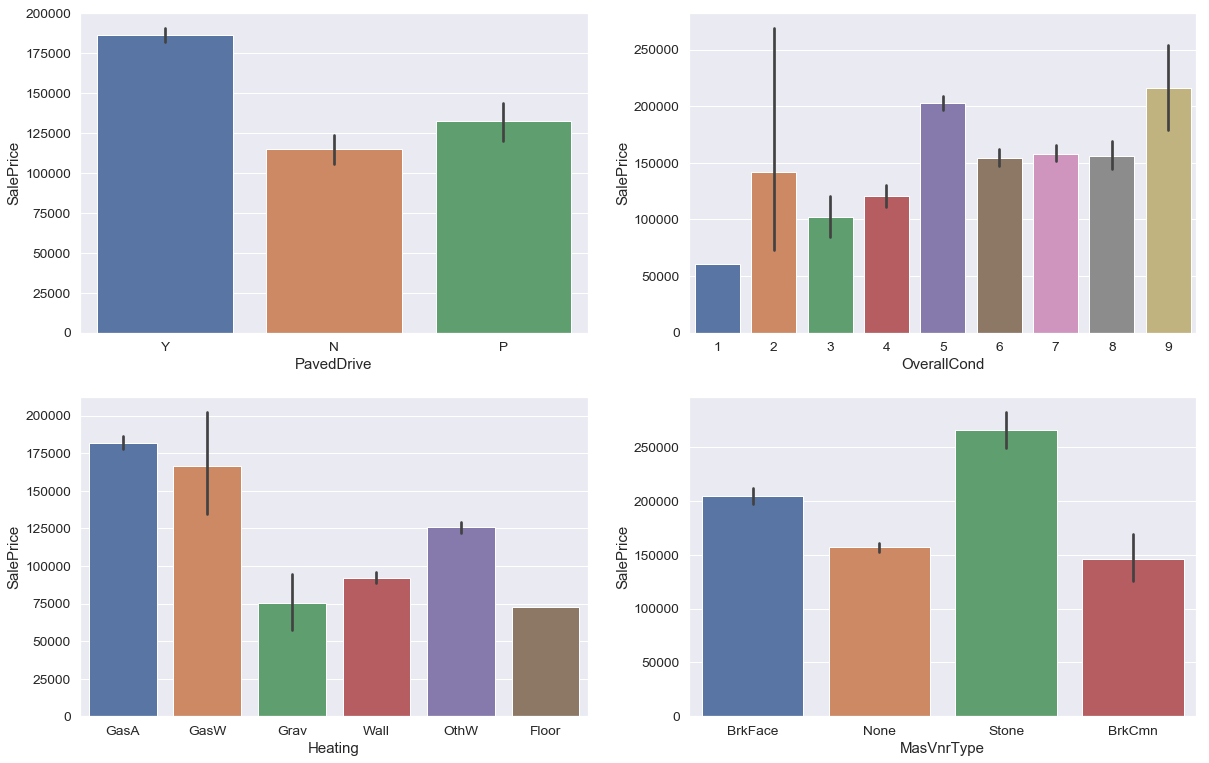

In [518]:
#Visualisig a few more categorical variables
plt.figure(figsize=(20, 20))

plt.subplot(3,2,1)
sns.barplot(data=housing_df,x="PavedDrive",y='SalePrice')

plt.subplot(3,2,2)
sns.barplot(data=housing_df,x="OverallCond",y='SalePrice')

plt.subplot(3,2,3)
sns.barplot(data=housing_df,x="Heating",y='SalePrice')

plt.subplot(3,2,4)
sns.barplot(data=housing_df,x="MasVnrType",y='SalePrice')


plt.show()

#### Inference:

1. Sale Price vs Paved Drive - Properties with a Paved or Partially Paved Drive have a higher Sale Price.


2. Sale Price vs Overall Condition - The sale prices of properties are high for those whose overall conditions are Average or Excellent and are low as expected for those whose overall condition is poor.


3. Sale Price vs Heating - Properties which have Gas forced warm air furnace or Gas hot water or steam heat have a high Sale Price.


4. Sale Price vs Masonry veneer type - Stone and Brick Face type of veneer have the highest Sale Prices  while the Sale price is significantly lower for properties with no Masonry Veneer.

### Visualising the Numeric Columns

#### Performing univariate on the "SalePrice" column

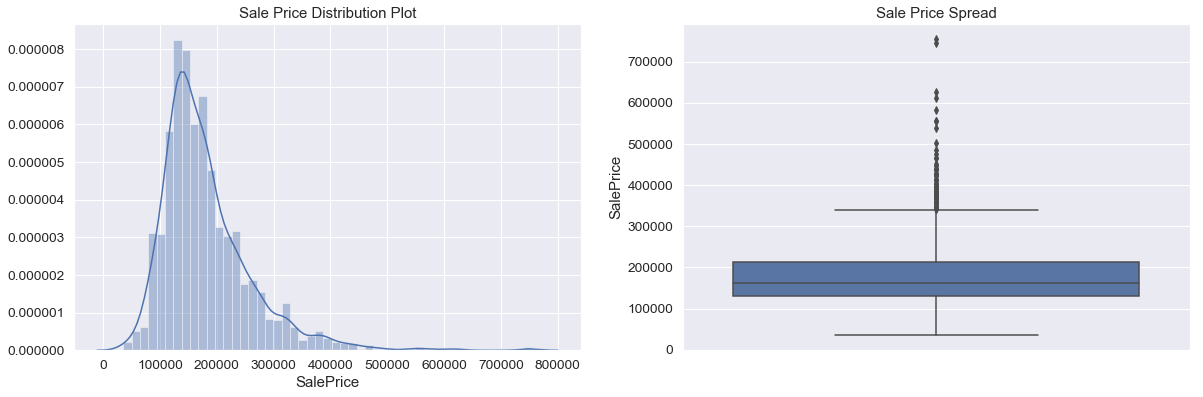

In [519]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title('Sale Price Distribution Plot')
sns.distplot(housing_df["SalePrice"])

plt.subplot(1,2,2)
plt.title('Sale Price Spread')
sns.boxplot(y=housing_df["SalePrice"])

plt.show()

We can see that the sale price distribution is right skewed and has a median value of of about 15,000.We can see that it is not normally distributed. Hence, we will tranform it before regression.

### OUTLIER ANALYSIS

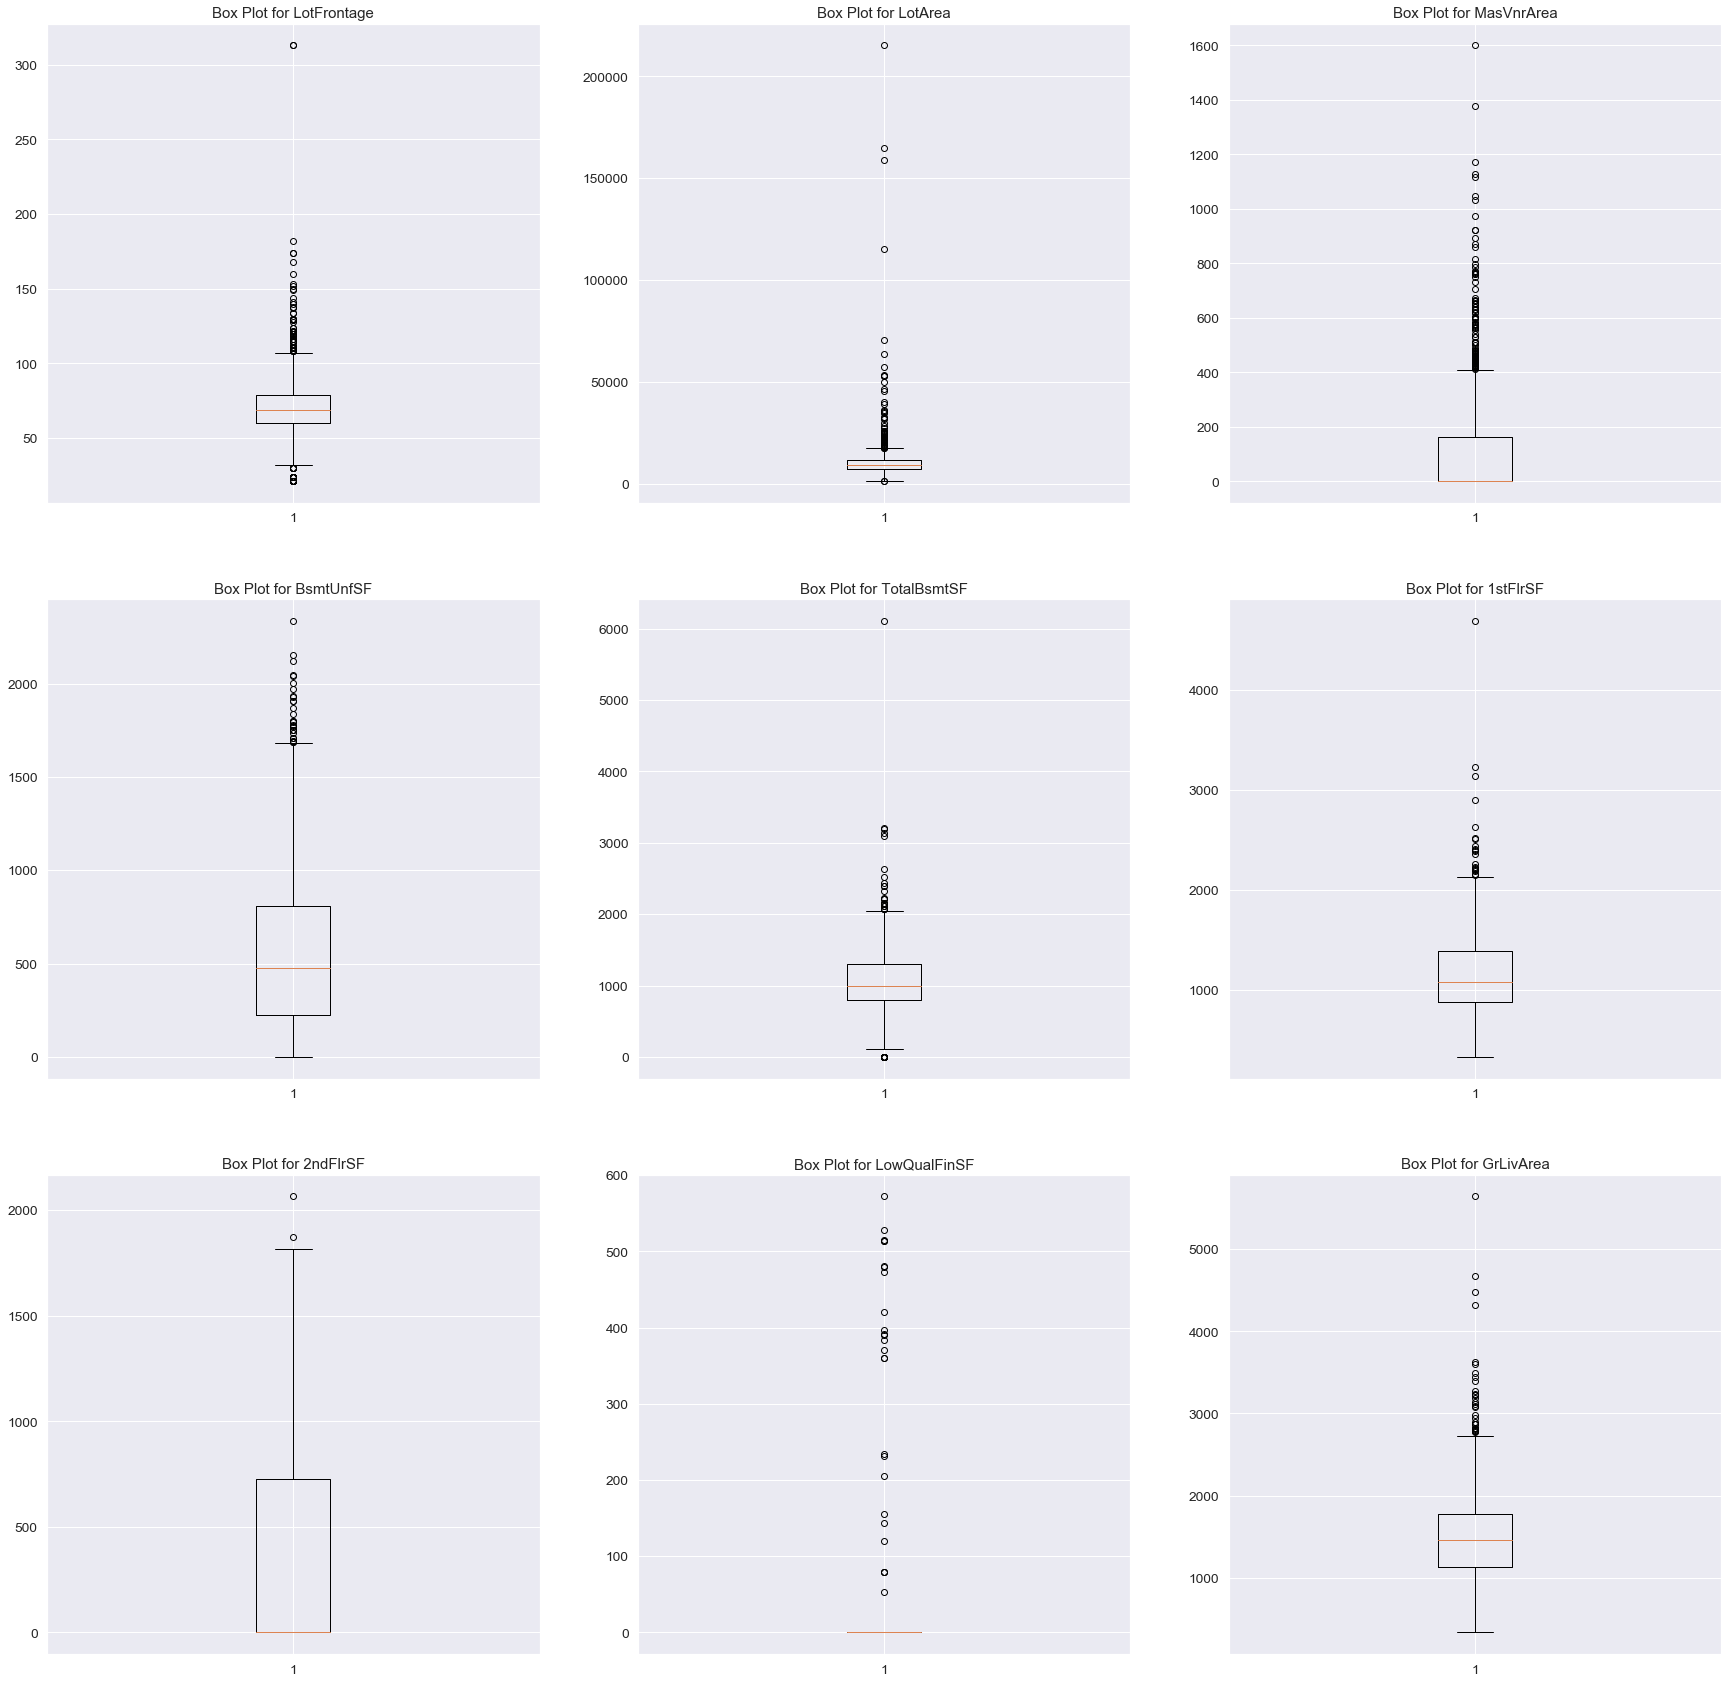

In [520]:
#Plotting Box plots for numerical variables
plt.figure(figsize=(30, 30))

plt.subplot(3,3,1)
plt.boxplot(housing_df["LotFrontage"])
plt.title('Box Plot for LotFrontage')

plt.subplot(3,3,2)
plt.boxplot(housing_df["LotArea"])
plt.title('Box Plot for LotArea')

plt.subplot(3,3,3)
plt.boxplot(housing_df["MasVnrArea"])
plt.title('Box Plot for MasVnrArea')

plt.subplot(3,3,4)
plt.boxplot(housing_df["BsmtUnfSF"])
plt.title('Box Plot for BsmtUnfSF')

plt.subplot(3,3,5)
plt.boxplot(housing_df["TotalBsmtSF"])
plt.title('Box Plot for TotalBsmtSF')

plt.subplot(3,3,6)
plt.boxplot(housing_df["1stFlrSF"])
plt.title('Box Plot for 1stFlrSF')

plt.subplot(3,3,7)
plt.boxplot(housing_df["2ndFlrSF"])
plt.title('Box Plot for 2ndFlrSF')

plt.subplot(3,3,8)
plt.boxplot(housing_df["LowQualFinSF"])
plt.title('Box Plot for LowQualFinSF')

plt.subplot(3,3,9)
plt.boxplot(housing_df["GrLivArea"])
plt.title('Box Plot for GrLivArea')

plt.show()

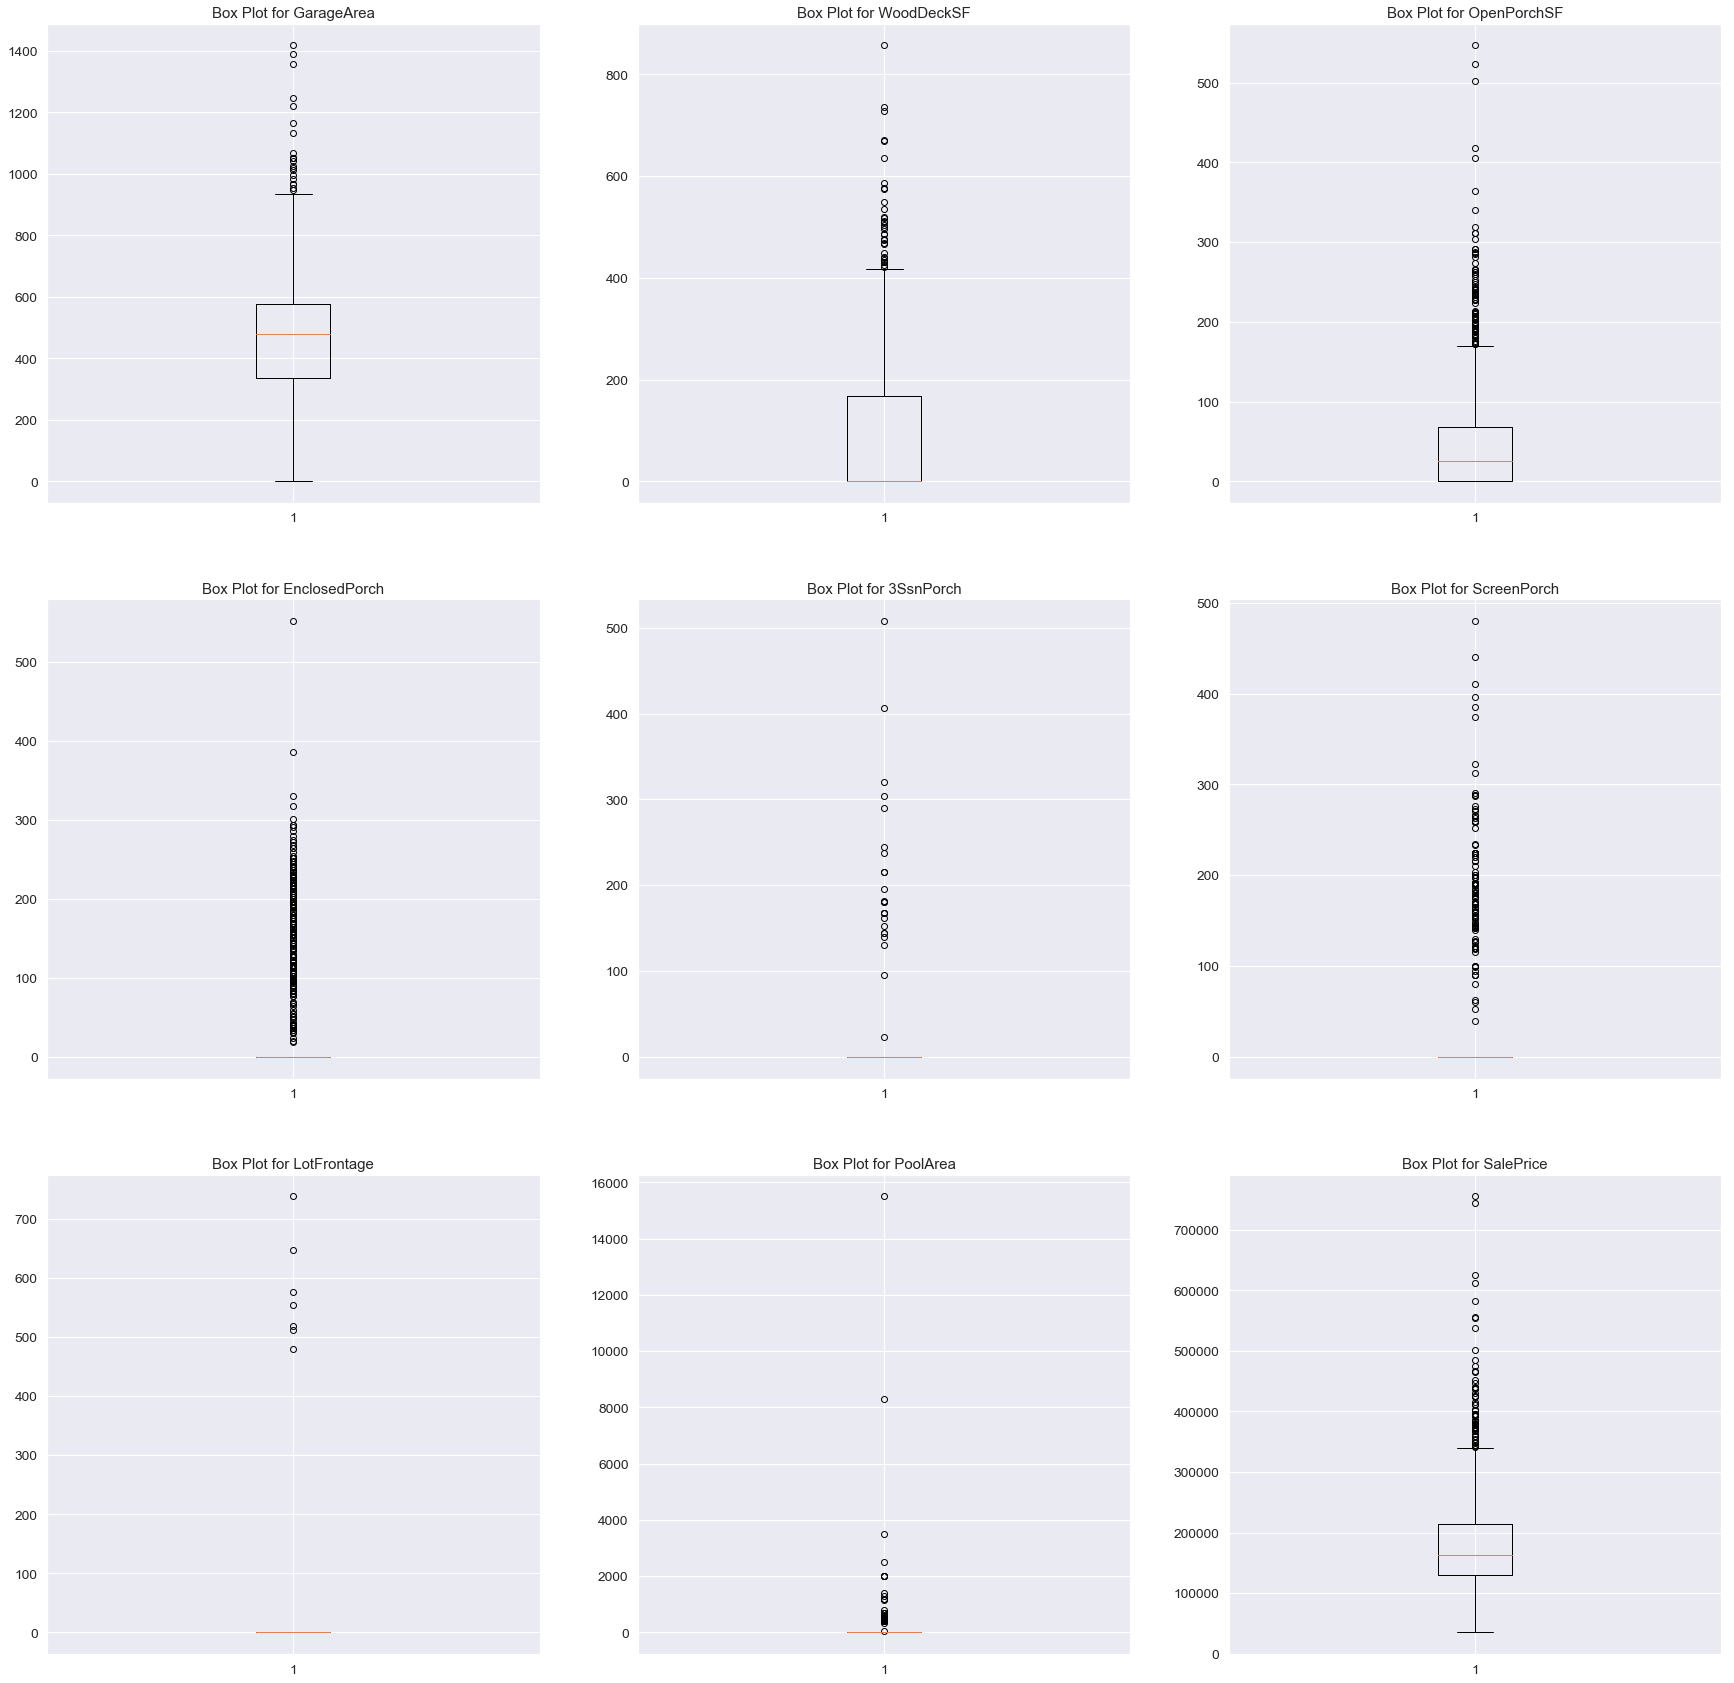

In [521]:
#Plotting Box plot for the other numerical variables as well
plt.figure(figsize=(30, 30))

plt.subplot(3,3,1)
plt.boxplot(housing_df["GarageArea"])
plt.title('Box Plot for GarageArea')

plt.subplot(3,3,2)
plt.boxplot(housing_df["WoodDeckSF"])
plt.title('Box Plot for WoodDeckSF')

plt.subplot(3,3,3)
plt.boxplot(housing_df["OpenPorchSF"])
plt.title('Box Plot for OpenPorchSF')

plt.subplot(3,3,4)
plt.boxplot(housing_df["EnclosedPorch"])
plt.title('Box Plot for EnclosedPorch')

plt.subplot(3,3,5)
plt.boxplot(housing_df["3SsnPorch"])
plt.title('Box Plot for 3SsnPorch')

plt.subplot(3,3,6)
plt.boxplot(housing_df["ScreenPorch"])
plt.title('Box Plot for ScreenPorch')

plt.subplot(3,3,7)
plt.boxplot(housing_df["PoolArea"])
plt.title('Box Plot for LotFrontage')

plt.subplot(3,3,8)
plt.boxplot(housing_df["MiscVal"])
plt.title('Box Plot for PoolArea')

plt.subplot(3,3,9)
plt.boxplot(housing_df["SalePrice"])
plt.title('Box Plot for SalePrice')

plt.show()

#### Now, as per data distribution and box plot there are outlier's in data but we can't treat outlier's in all columns as we have a small data set and plus outlier's in some of the variables are actually useful in our predictions. So we will do outlier treatment for "LotFrontage", "LotArea" and "MiscVal" variables only.

In [522]:
#Fucntion to plot Box plot and dist plot for numerical columns post outlier treatment
def PlotNumerical(var1):
    
    fig, ax=plt.subplots(nrows=1,ncols=2, figsize=(15,6))
    
    ax[0].set_title('Box-plot for' + var1, fontsize=10)
    ax[1].set_title('Distplot', fontsize=10)
    s1=sns.boxplot(y=var1,data=housing_df,ax=ax[0])
    s2=sns.distplot(housing_df[var1],ax=ax[1])
    plt.show()

In [523]:
# Removing outliers from the "LotFrontage" column
Q1 = housing_df['LotFrontage'].quantile(0.25)
Q3 = housing_df['LotFrontage'].quantile(0.75)
IQR = Q3 - Q1
housing_df = housing_df[((housing_df['LotFrontage'] >= (Q1 - 1.5 * IQR))& (housing_df['LotFrontage'] <= (Q3 + 1.5 * IQR)))]

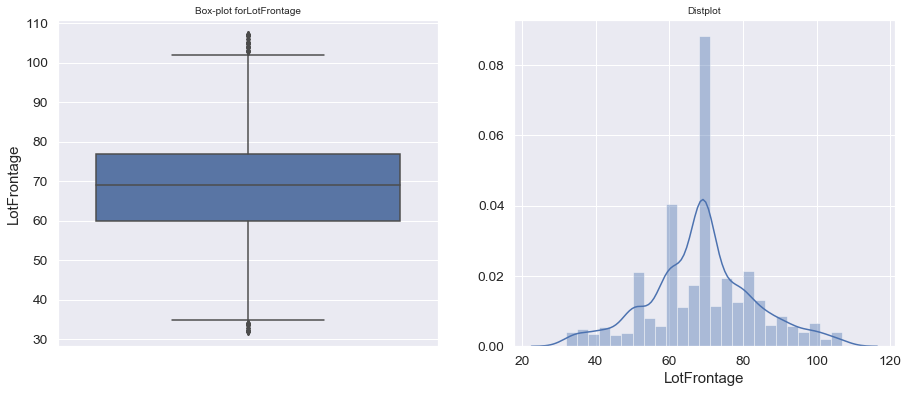

In [524]:
#Plotting "LotFrontage" after outlier removal
PlotNumerical("LotFrontage")

In [525]:
# Removing outliers from the "LotArea" column
Q1 = housing_df['LotArea'].quantile(0.25)
Q3 = housing_df['LotArea'].quantile(0.75)
IQR = Q3 - Q1
housing_df = housing_df[((housing_df['LotArea'] >= (Q1 - 1.5 * IQR))& (housing_df['LotArea'] <= (Q3 + 1.5 * IQR)))]

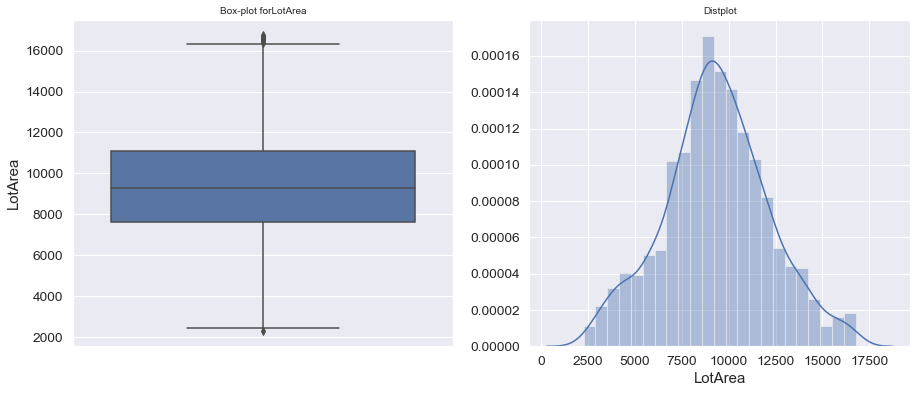

In [526]:
#Plotting "LotArea" after outlier treatment
PlotNumerical("LotArea")

In [527]:
# Removing outliers from the "MiscVal" column
Q1 = housing_df['MiscVal'].quantile(0.25)
Q3 = housing_df['MiscVal'].quantile(0.75)
IQR = Q3 - Q1
housing_df = housing_df[((housing_df['MiscVal'] >= (Q1 - 1.5 * IQR))& (housing_df['MiscVal'] <= (Q3 + 1.5 * IQR)))]

In [528]:
# Check number of row retained after outlier treatment
housing_df.shape

(1240, 72)

In [529]:
# correlation matrix
cor = housing_df.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Years_since_remod,Age,Garage_Age,Years_sincesold
MSSubClass,1.000000,-0.292715,-0.307488,0.077057,-0.058906,0.000116,-0.042830,-0.097233,-0.103257,-0.194066,-0.155810,0.304289,0.056426,0.160453,0.034772,0.002626,0.172166,0.114611,0.017644,0.344996,0.118676,0.024325,0.002991,-0.052400,-0.003098,0.031674,0.024247,-0.035148,-0.003530,-0.006151,NaN,-0.022045,-0.059676,-0.000844,-0.091653,0.030915
LotFrontage,-0.292715,1.000000,0.526972,0.254121,-0.067009,0.276461,0.131456,0.065651,0.127331,0.301219,0.335129,0.106643,0.001394,0.341692,0.030367,-0.008198,0.202850,0.159875,0.285170,0.004536,0.334549,0.181244,0.313923,0.337842,0.093471,0.116228,-0.074178,0.076531,0.066057,0.023348,NaN,0.379979,-0.080758,-0.197202,-0.067226,-0.006174
LotArea,-0.307488,0.526972,1.000000,0.224680,-0.043270,0.208740,0.168937,0.074928,0.077664,0.289358,0.362901,0.148211,-0.012632,0.397696,0.056981,0.032598,0.204642,0.200801,0.312864,-0.024620,0.379798,0.264819,0.282834,0.313264,0.158624,0.125160,-0.069128,0.039556,0.091184,0.010002,NaN,0.404380,-0.053661,-0.129841,-0.008247,0.021824
OverallQual,0.077057,0.254121,0.224680,1.000000,-0.112335,0.386216,0.206874,-0.063664,0.318154,0.540992,0.477745,0.265576,-0.069771,0.581001,0.099189,-0.045960,0.556797,0.280108,0.084582,-0.192555,0.407127,0.404766,0.605459,0.564803,0.235698,0.323216,-0.147761,0.038019,0.068438,-0.002741,NaN,0.815815,-0.551381,-0.593950,-0.406291,0.016780
OverallCond,-0.058906,-0.067009,-0.043270,-0.112335,1.000000,-0.120032,-0.049453,0.057608,-0.152149,-0.196958,-0.173903,0.025166,0.006221,-0.105239,-0.056941,0.134387,-0.229989,-0.038688,0.004392,-0.078663,-0.081279,-0.043119,-0.192806,-0.148201,-0.002526,-0.041310,0.098557,0.020622,0.036276,0.015438,NaN,-0.113599,-0.063629,0.374621,0.295802,-0.037737
MasVnrArea,0.000116,0.276461,0.208740,0.386216,-0.120032,1.000000,0.221251,-0.062442,0.123444,0.343037,0.340825,0.138131,-0.064093,0.367595,0.077706,0.009471,0.271093,0.186028,0.095976,-0.027299,0.275866,0.265659,0.375442,0.370961,0.152203,0.130654,-0.129306,0.026100,0.096911,-0.010757,NaN,0.472611,-0.168406,-0.307994,-0.183094,-0.010781
BsmtFinSF1,-0.042830,0.131456,0.168937,0.206874,-0.049453,0.221251,1.000000,-0.043960,-0.537434,0.438474,0.368490,-0.189059,-0.063170,0.097846,0.655317,0.075752,0.046820,-0.005450,-0.121162,-0.093592,-0.011572,0.209876,0.210089,0.243144,0.197152,0.068474,-0.144252,0.023907,0.072945,0.015620,NaN,0.373428,-0.132212,-0.270879,-0.126866,-0.015321
BsmtFinSF2,-0.097233,0.065651,0.074928,-0.063664,0.057608,-0.062442,-0.043960,1.000000,-0.202971,0.103708,0.084555,-0.114147,-0.000096,-0.038949,0.154510,0.067189,-0.098274,-0.055511,-0.006574,-0.042221,-0.051893,0.011264,-0.044323,-0.016816,0.089295,-0.019660,0.029168,-0.029461,0.045451,0.041675,NaN,-0.027496,0.065551,0.045995,0.097095,-0.042636
BsmtUnfSF,-0.103257,0.127331,0.077664,0.318154,-0.152149,0.123444,-0.537434,-0.202971,1.000000,0.459535,0.347605,-0.006823,0.013921,0.251429,-0.425981,-0.101399,0.293228,-0.026197,0.147380,0.030824,0.237223,0.057016,0.219179,0.192763,-0.007620,0.133863,-0.003013,0.024430,-0.016169,-0.027798,NaN,0.234335,-0.178701,-0.162243,-0.162549,0.028283
TotalBsmtSF,-0.194066,0.301219,0.289358,0.540992,-0.196958,0.343037,0.438474,0.103708,0.459535,1.000000,0.797132,-0.247309,-0.050721,0.363237,0.274666,-0.007064,0.333713,-0.055057,0.032613,-0.079625,0.228628,0.285776,0.443059,0.458846,0.230679,0.210890,-0.143034,0.040772,0.075336,0.001343,NaN,0.636442,-0.309498,-0.443490,-0.274477,-0.000857


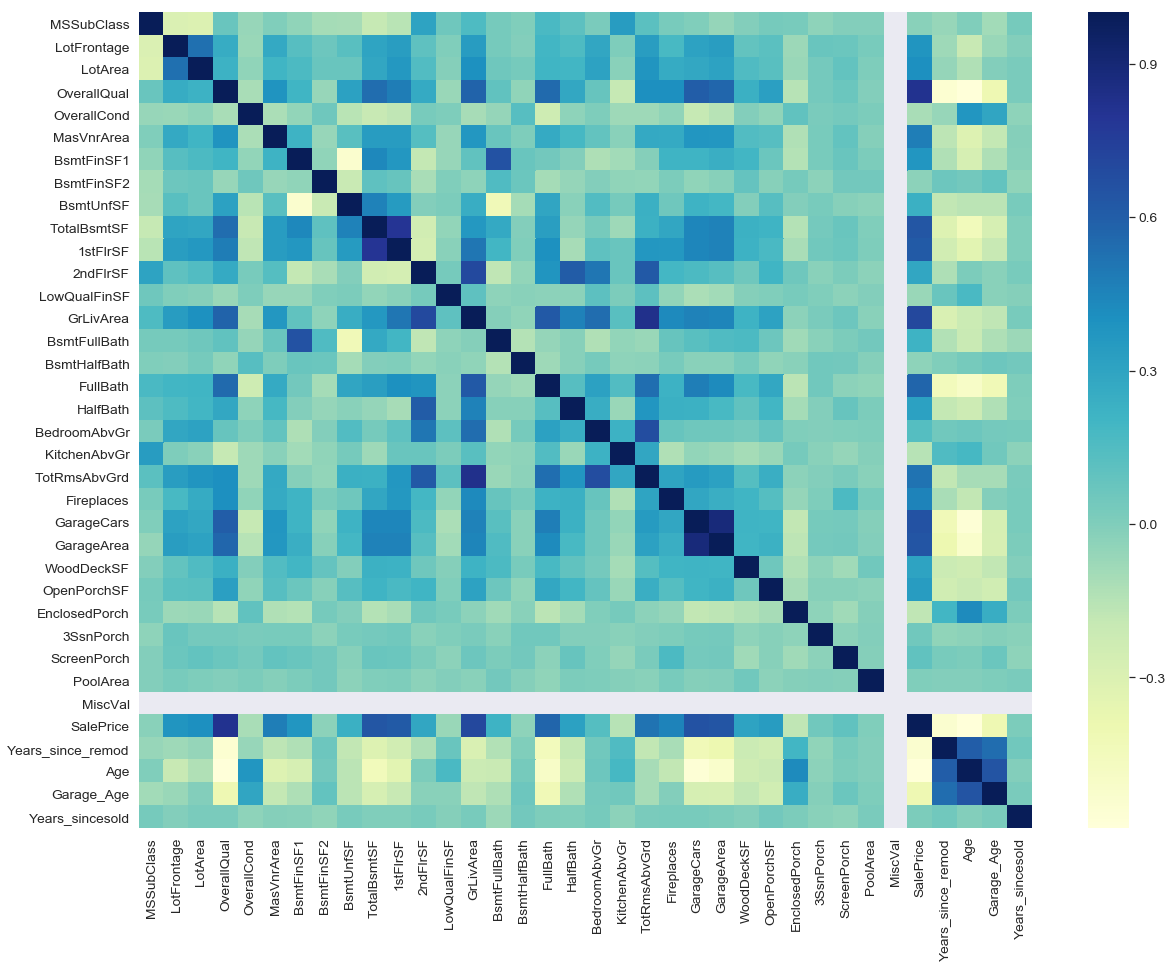

In [530]:
#Plotting a heatmap to see the correlation between the variables

plt.figure(figsize=(20,15))
corrmat=housing_df.corr()
sns.heatmap(corrmat,cmap='YlGnBu')
plt.show()

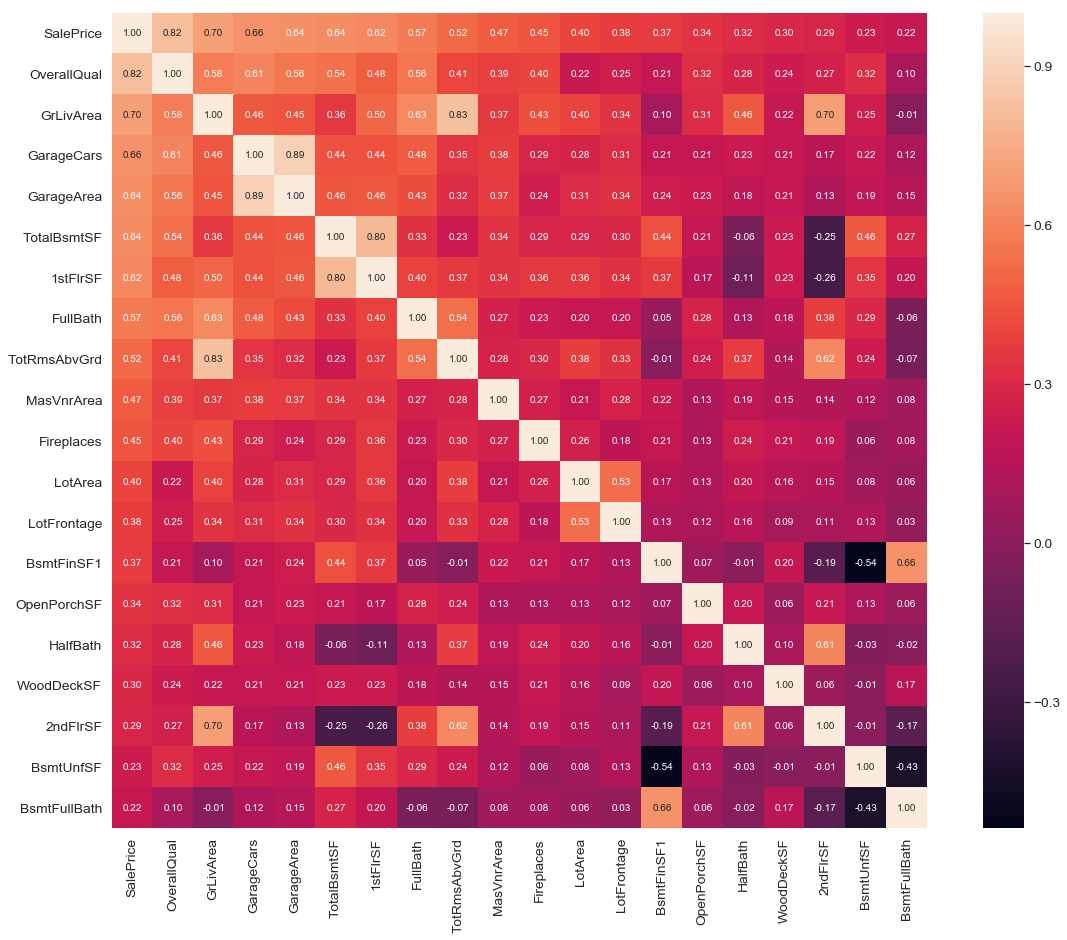

In [531]:
cols = corrmat.nlargest(20, 'SalePrice')['SalePrice'].index
p = np.corrcoef(housing_df[cols].values.T)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.25)
hm = sns.heatmap(p, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

The heatmap shows some useful insights:

Correlation of Sale price with independent variables:

1. Sale Price is highly (positively) correlated with OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF and 1stFlrSF.

2. Sale Price is negatively correlated to Age and Years_since_remod which suggests the Saleprice decreases with the increase in Age of the property (number of years since the property was built) and also decreases with the increase in the number of years since the property was remodelled.

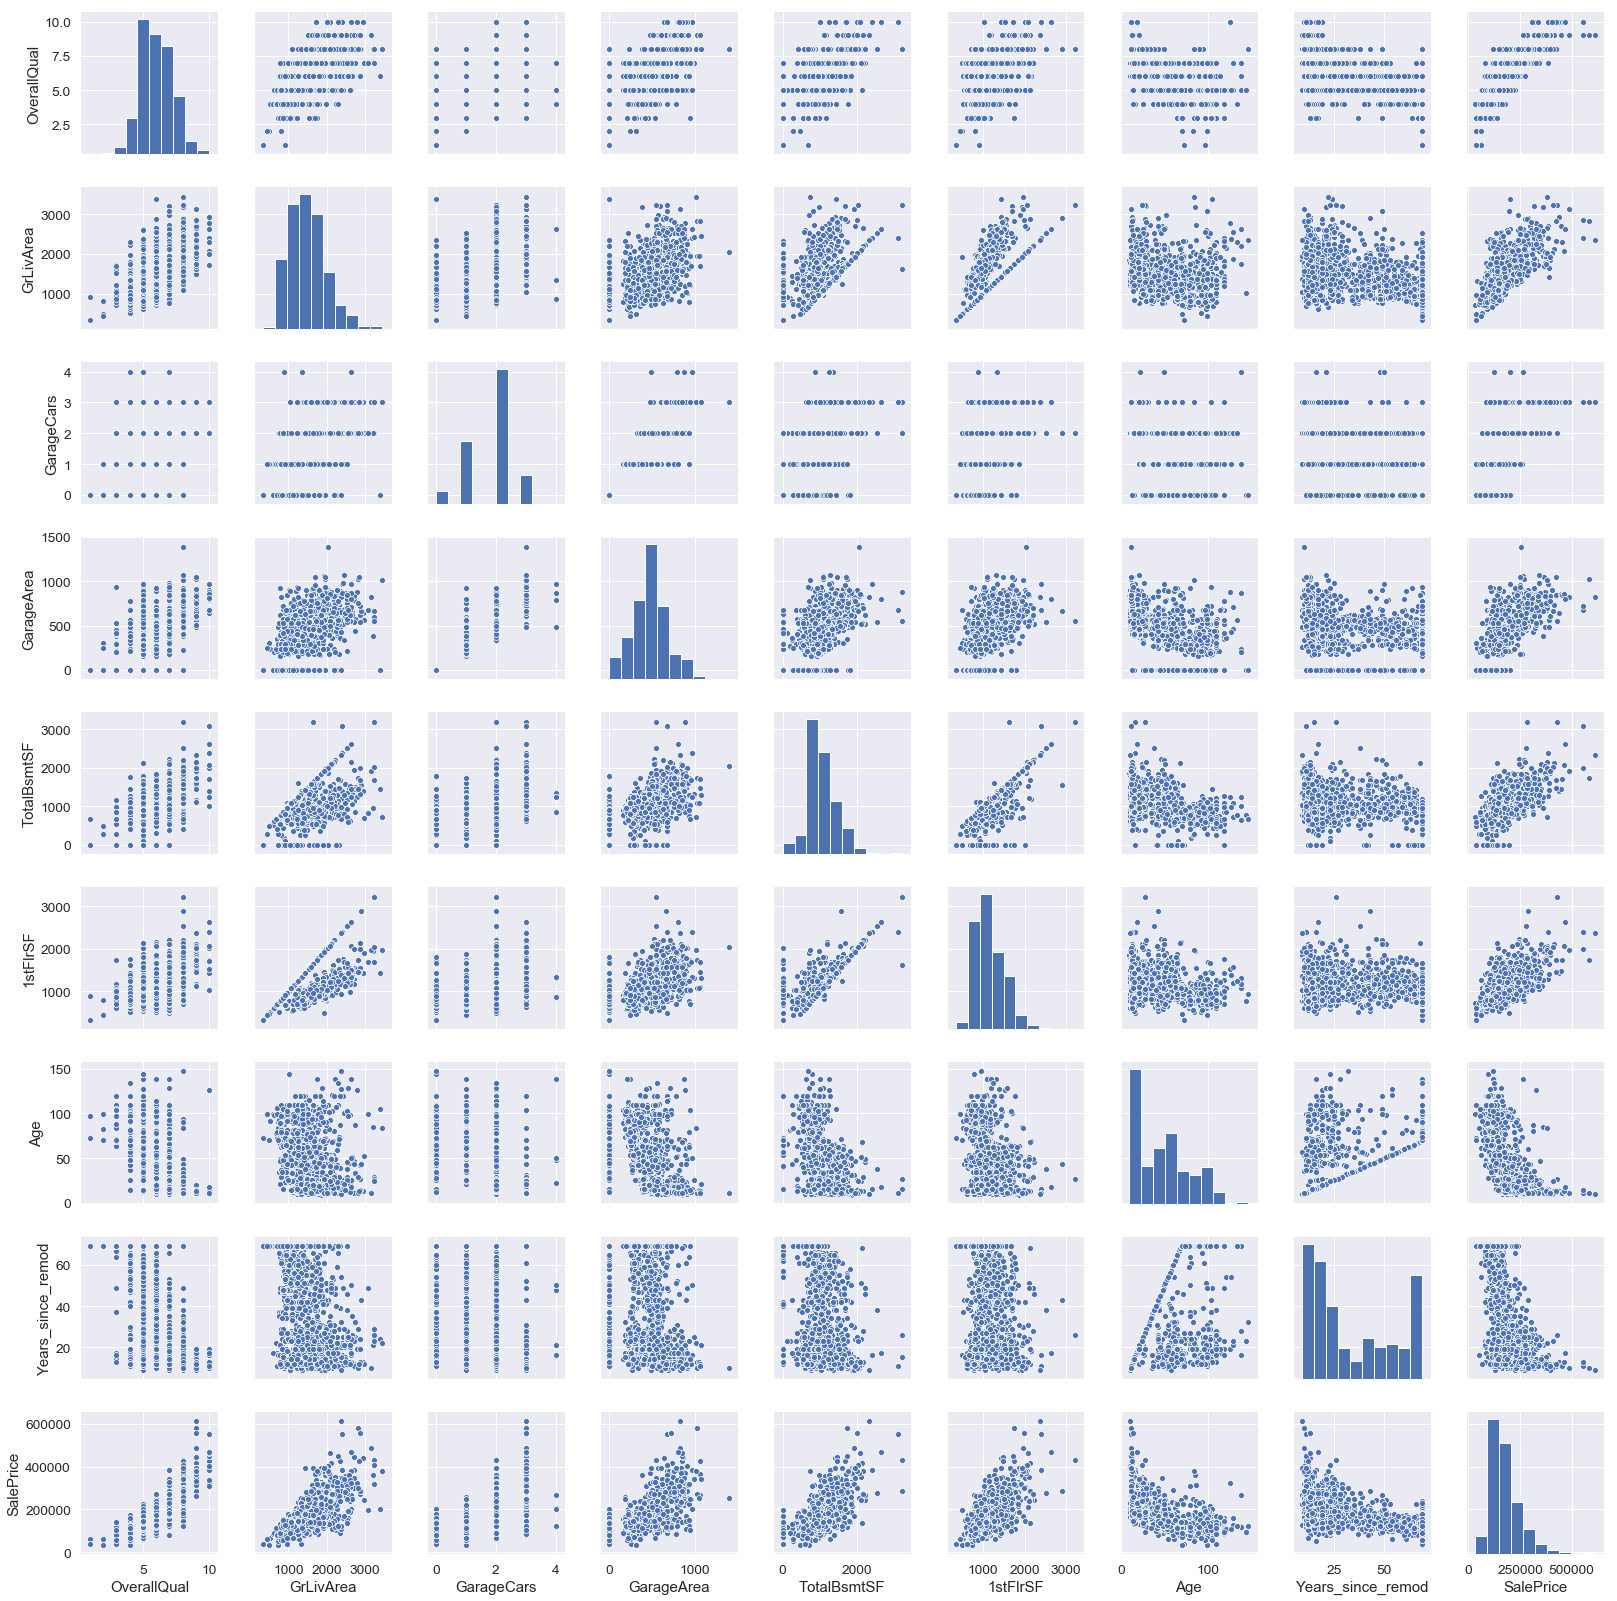

<Figure size 1440x720 with 0 Axes>

In [532]:
#Creating a pairplot to visualize all numeric variables
pair=sns.pairplot(housing_df[["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF","Age","Years_since_remod","SalePrice"]])
plt.figure(figsize=(20, 10))
plt.show()

#### The above stated correlations from the heatmap can be confirmed from the pairplot as well.

### STEP 4: DATA PREPARATION FOR MODEL BUILDING (CREATING DUMMY VARIABLES AND FEATURE SCALING)

In [533]:
# Creating dummies for categorical columns

dummies = pd.get_dummies(housing_df[categoricalCols], drop_first = True)

# Merging the dummies to the dataframe
housing_df = pd.concat([housing_df, dummies], axis = 1)

# Dropping the original categorical columns
housing_df.drop(columns=categoricalCols,inplace=True)

housing_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Years_since_remod,Age,Garage_Age,Years_sincesold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500,16,16,16.0,11.2,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0

In [534]:
housing_df.shape

(1240, 229)

In [535]:
#Splitting into X and y 
y= housing_df["SalePrice"]
X=housing_df.drop(["SalePrice"],axis=1)

In [536]:
# Feature Scaling

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=228)

### STEP 5: SPLITTING THE DATA INTO TRAINING AND TEST SETS

In [537]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80,test_size = 0.20, random_state=100)

### STEP 6: MODEL BUILDING 

### LASSO REGRESSION

In [538]:
# number of features
len(X_train.columns)

228

In [539]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   28.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [540]:
#Results dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.202351,0.021104,0.000598,0.001197,0.0001,{'alpha': 0.0001},-16398.891299,-17618.798291,-16272.269367,-15665.943590,-14557.847127,-16104.576739,999.430680,28,-11482.530487,-11326.354485,-11552.832991,-11686.367754,-12079.533246,-11625.523793,254.974463
1,0.211495,0.016795,0.000000,0.000000,0.001,{'alpha': 0.001},-16398.787691,-17618.777955,-16272.254336,-15665.918277,-14557.578232,-16104.490152,999.503156,27,-11482.530336,-11326.349310,-11552.830244,-11686.369243,-12079.531008,-11625.522028,254.975125
2,0.209325,0.007653,0.000000,0.000000,0.01,{'alpha': 0.01},-16391.674103,-17618.572228,-16272.103043,-15665.665476,-14554.894746,-16102.405591,999.870055,26,-11482.530570,-11326.297095,-11552.812019,-11686.388230,-12079.510435,-11625.507670,254.981972
3,0.224947,0.007653,0.003124,0.006249,0.05,{'alpha': 0.05},-16364.936038,-17617.648863,-16271.429842,-15664.537115,-14550.435450,-16095.606927,999.541321,25,-11482.548154,-11326.085182,-11552.769386,-11686.502576,-12079.464111,-11625.473882,255.021148
4,0.213413,0.016551,0.001197,0.000977,0.1,{'alpha': 0.1},-16344.051929,-17616.497275,-16270.585532,-15663.103801,-14546.374957,-16089.921392,999.436946,24,-11482.590658,-11325.913416,-11552.764929,-11686.653592,-12079.414905,-11625.467500,255.046697


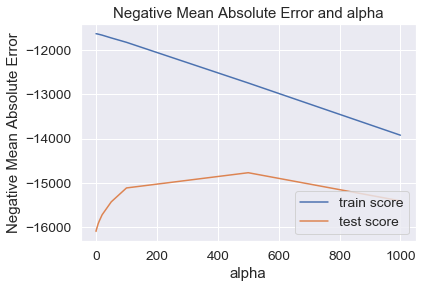

In [541]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='lower right')
plt.show()

In [542]:
model_cv.best_score_

-14774.469041420729

In [543]:
model_cv.best_params_

{'alpha': 500}

In [544]:
alpha=500

lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)

Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [545]:
lasso.coef_

array([-2.53454696e+03,  1.29343530e+03,  5.83676443e+03,  1.10466215e+04,
        5.81252314e+03,  1.21440619e+03,  6.27027208e+03,  1.71794309e+02,
       -0.00000000e+00,  8.40915164e+03,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  2.36717201e+04,  7.83076874e+02, -0.00000000e+00,
        1.57389834e+03,  1.08418521e+03, -2.57303746e+03, -3.23640703e+03,
        2.02953394e+03,  1.22383494e+03,  2.47073229e+03,  2.08808993e+03,
        4.01090886e+02,  1.36201633e+03,  2.78610973e+02,  4.44176999e+02,
        1.13080253e+03,  0.00000000e+00,  0.00000000e+00, -2.38530709e+03,
       -1.04422608e+04, -3.21489642e+02, -0.00000000e+00,  2.22387908e+03,
        0.00000000e+00,  0.00000000e+00, -6.07194959e+02,  0.00000000e+00,
       -1.13949440e+02,  7.95317184e+02,  0.00000000e+00, -8.45549030e+02,
       -0.00000000e+00,  4.10335344e+02, -4.33189701e+02, -8.31963333e+01,
        0.00000000e+00,  0.00000000e+00, -3.51893853e+02,  1.62778494e+03,
        0.00000000e+00,  

#### From the above output we can see that a lot features are being converted to 0, leading to feature selection. All the least important variables are eliminated

In [546]:
# prediction
y_train_pred=lasso.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred=lasso.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.933295515569918
0.9294813866654049


In [547]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 179004.883),
 ('MSSubClass', -2534.547),
 ('LotFrontage', 1293.435),
 ('LotArea', 5836.764),
 ('OverallQual', 11046.622),
 ('OverallCond', 5812.523),
 ('MasVnrArea', 1214.406),
 ('BsmtFinSF1', 6270.272),
 ('BsmtFinSF2', 171.794),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 8409.152),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 23671.72),
 ('BsmtFullBath', 783.077),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 1573.898),
 ('HalfBath', 1084.185),
 ('BedroomAbvGr', -2573.037),
 ('KitchenAbvGr', -3236.407),
 ('TotRmsAbvGrd', 2029.534),
 ('Fireplaces', 1223.835),
 ('GarageCars', 2470.732),
 ('GarageArea', 2088.09),
 ('WoodDeckSF', 401.091),
 ('OpenPorchSF', 1362.016),
 ('EnclosedPorch', 278.611),
 ('3SsnPorch', 444.177),
 ('ScreenPorch', 1130.803),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('Years_since_remod', -2385.307),
 ('Age', -10442.261),
 ('Garage_Age', -321.49),
 ('Years_sincesold', -0.0),
 ('MSZoning_FV', 2223.879),
 ('MSZoning_RH', 0.0),
 ('MSZ

In [548]:
main_coef=pd.Series(lasso.coef_,index=X_train.columns)
var_selected= sum(lasso.coef_!=0)
print("the num of feautes selected by lasso : ",var_selected)

the num of feautes selected by lasso :  118


In [549]:
main_features=pd.concat([main_coef.sort_values(ascending=False).head(10),main_coef.sort_values(ascending=False).tail(10)])
main_features

GrLivArea                23671.720052
OverallQual              11046.621538
TotalBsmtSF               8409.151638
BsmtFinSF1                6270.272082
Neighborhood_StoneBr      6058.405974
LotArea                   5836.764426
OverallCond               5812.523143
BsmtExposure_Gd           5647.074302
Neighborhood_NridgHt      5137.962912
SaleCondition_Partial     4562.237368
MSSubClass               -2534.546959
BedroomAbvGr             -2573.037459
KitchenAbvGr             -3236.407031
BsmtQual_TA              -4299.454285
KitchenQual_Gd           -6163.329538
KitchenQual_TA           -6283.065361
BsmtQual_Gd              -6307.176571
ExterQual_Gd             -6501.832018
ExterQual_TA             -7121.127396
Age                     -10442.260773
dtype: float64

Text(0.5, 1.0, 'Coefficients in the Model')

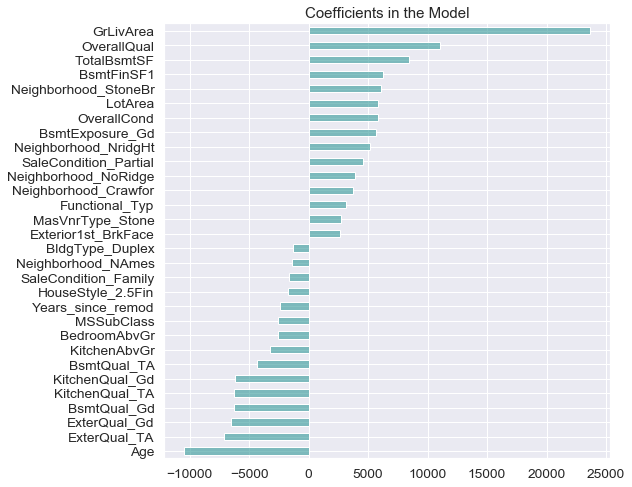

In [550]:
#Visualising the significant coefficients
plt.figure(figsize=(8,8))
coef = pd.Series(lasso.coef_, index = X_train.columns).sort_values()
imp_coef = pd.concat([coef.head(15), coef.tail(15)])
imp_coef.plot(kind = "barh", color=(0.2, 0.6, 0.6, 0.6))
plt.title("Coefficients in the Model")

### RIDGE REGRESSION

In [551]:
# Ridge regression without tuning hyper parameter
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.942985256389115
0.9152448228177956


#### The above alpha however is not optimal and hence we will tune the hyperparameter.

In [552]:
# Ridge Regression with hyperparameter tuning
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100,500,1000]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [553]:
#Results dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013512,0.005127,0.001595,0.001493,0.0001,{'alpha': 0.0001},-16320.468644,-17685.025015,-16280.757345,-15669.645235,-14542.719002,-16101.543661,1020.423188,27,-11481.875635,-11330.454750,-11545.607050,-11686.123836,-12080.096212,-11624.831497,254.712886
1,0.017589,0.004904,0.000997,0.001261,0.001,{'alpha': 0.001},-16320.396743,-17684.516135,-16280.594586,-15669.510183,-14542.572817,-16101.338533,1020.311963,26,-11481.853024,-11330.410980,-11545.649432,-11686.124842,-12080.089162,-11624.825488,254.720435
2,0.013764,0.001465,0.001794,0.000399,0.01,{'alpha': 0.01},-16319.682499,-17679.488428,-16278.987169,-15668.162732,-14541.110886,-16099.305091,1019.220036,25,-11481.698781,-11330.029013,-11546.064030,-11686.135199,-12080.019246,-11624.789254,254.775907
3,0.013078,0.005312,0.000399,0.000798,0.05,{'alpha': 0.05},-16316.606471,-17658.391187,-16272.385746,-15662.239780,-14534.612992,-16090.659033,1014.785914,24,-11481.838648,-11328.507281,-11547.726019,-11686.453354,-12079.720708,-11624.849202,254.920261
4,0.015622,0.000001,0.000000,0.000000,0.1,{'alpha': 0.1},-16312.967441,-17634.507488,-16265.570751,-15654.979075,-14526.497048,-16080.708459,1010.087951,23,-11482.054820,-11326.769857,-11549.468918,-11687.261712,-12079.372910,-11624.985644,255.112034


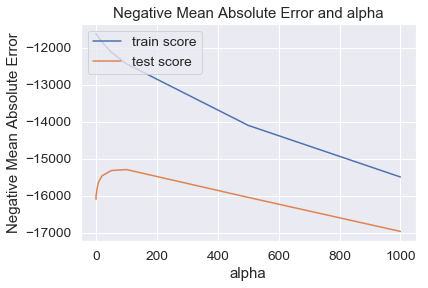

In [554]:
# plotting mean test and train scores to choose the optimal value of alpha (hyperparameter)
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [555]:
model_cv.best_score_

-15295.564067724534

In [556]:
# Checking best parameter (alpha)
model_cv.best_params_

{'alpha': 100}

In [557]:
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.85140409e+03,  1.95759487e+03,  5.95435810e+03,  8.85714624e+03,
        4.87467239e+03,  2.22945308e+03,  6.63375278e+03,  1.00128841e+03,
        8.70867814e+02,  8.25208979e+03,  6.41624775e+03,  5.65845343e+03,
       -6.54400019e+01,  9.74121750e+03,  1.32088088e+03,  5.50193859e+01,
        3.90188663e+03,  2.87297178e+03, -2.68801476e+03, -3.58366885e+03,
        3.93987155e+03,  2.49970852e+03,  2.65818704e+03,  2.78403464e+03,
        1.22303826e+03,  1.79509466e+03,  1.15843050e+03,  1.11552254e+03,
        1.64819650e+03,  5.74299052e-28,  0.00000000e+00, -2.94635427e+03,
       -5.91702696e+03, -1.28675286e+03, -2.92354592e+02,  2.59395636e+03,
        3.44039119e+02,  1.32037584e+03, -1.09236856e+02, -2.93127158e+02,
       -3.99364755e+02,  1.38261493e+03,  3.91706653e+02, -1.85494095e+03,
       -4.82085823e+02,  9.36028225e+02, -1.09800346e+03, -5.94629734e+02,
       -1.06674808e+02,  4.81236085e+02, -1.37060245e+03,  1.11210193e+03,
       -4.73785518e+01, -

In [558]:
#R2 score for train dataset
y_train_pred_ridge = ridge.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred_ridge))

#R2 score for test dataset
y_test_pred_ridge = ridge.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.9371571129808829
0.9234548716038764


In [559]:
#ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 0) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 178860.0),
 ('MSSubClass', -1851.0),
 ('LotFrontage', 1958.0),
 ('LotArea', 5954.0),
 ('OverallQual', 8857.0),
 ('OverallCond', 4875.0),
 ('MasVnrArea', 2229.0),
 ('BsmtFinSF1', 6634.0),
 ('BsmtFinSF2', 1001.0),
 ('BsmtUnfSF', 871.0),
 ('TotalBsmtSF', 8252.0),
 ('1stFlrSF', 6416.0),
 ('2ndFlrSF', 5658.0),
 ('LowQualFinSF', -65.0),
 ('GrLivArea', 9741.0),
 ('BsmtFullBath', 1321.0),
 ('BsmtHalfBath', 55.0),
 ('FullBath', 3902.0),
 ('HalfBath', 2873.0),
 ('BedroomAbvGr', -2688.0),
 ('KitchenAbvGr', -3584.0),
 ('TotRmsAbvGrd', 3940.0),
 ('Fireplaces', 2500.0),
 ('GarageCars', 2658.0),
 ('GarageArea', 2784.0),
 ('WoodDeckSF', 1223.0),
 ('OpenPorchSF', 1795.0),
 ('EnclosedPorch', 1158.0),
 ('3SsnPorch', 1116.0),
 ('ScreenPorch', 1648.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('Years_since_remod', -2946.0),
 ('Age', -5917.0),
 ('Garage_Age', -1287.0),
 ('Years_sincesold', -292.0),
 ('MSZoning_FV', 2594.0),
 ('MSZoning_RH', 344.0),
 ('MSZoning_RL', 1320.0),
 ('MSZoning_RM', -10

In [560]:
main_coef=pd.Series(ridge.coef_,index=X_train.columns)
main_features=pd.concat([main_coef.sort_values(ascending=False).head(10),main_coef.sort_values(ascending=False).tail(10)])
main_features

GrLivArea               9741.217502
OverallQual             8857.146240
TotalBsmtSF             8252.089795
BsmtFinSF1              6633.752785
1stFlrSF                6416.247754
LotArea                 5954.358101
Neighborhood_StoneBr    5936.040783
2ndFlrSF                5658.453429
BsmtExposure_Gd         5582.912495
Neighborhood_NridgHt    4881.007641
Neighborhood_Edwards   -2801.484013
Years_since_remod      -2946.354267
KitchenAbvGr           -3583.668853
BsmtQual_TA            -3727.731159
ExterQual_Gd           -5139.911896
KitchenQual_TA         -5334.837636
ExterQual_TA           -5443.689036
BsmtQual_Gd            -5546.968351
KitchenQual_Gd         -5594.816523
Age                    -5917.026964
dtype: float64

Text(0.5, 1.0, 'Coefficients in the Ridge Model')

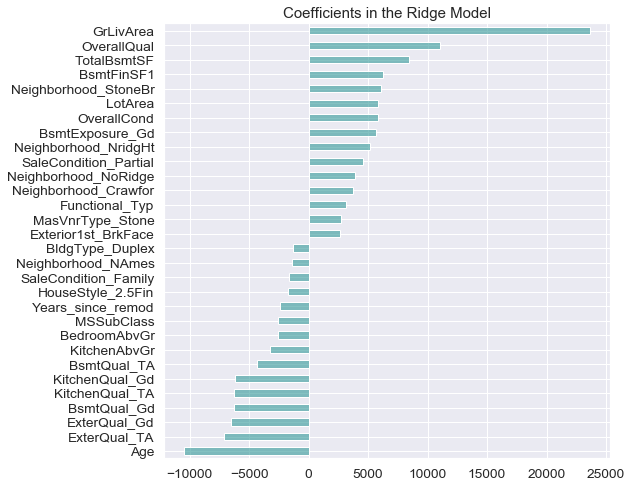

In [561]:
plt.figure(figsize=(8,8))
coef1 = pd.Series(ridge.coef_, index = X_train.columns).sort_values()
imp_coef = pd.concat([coef.head(15), coef.tail(15)])
imp_coef.plot(kind = "barh", color=(0.2, 0.6, 0.6, 0.6))
plt.title("Coefficients in the Ridge Model")

#### CONCLUSION: 

LASSO REGRESSION:<br>
Optimal Alpha value for Lasso : 500 <br>
R2 Score for train data: 93.33% <br>
R2 score for test data: 92.94% <br>

RIDGE REGRESSION:<br>
Optimal Alpha value for Ridge: 100 <br>
R2 Score for train data: 93.71 % <br>
R2 score for test data: 92.34 % <br>

After creating model in both Ridge and Lasso we can see that the R2_scores are almost same for both of them but as lasso will penalize high values of the coefficients β by actually setting them to zero if they are not relevant and also help in feature selection. Lasso allows for a more interpretable model, therefore I will make predictions using lasso.

Hence, we can conclude the following :

The top variables that positively affect the Sale Price are:
1. *GrLivArea* &emsp; 23671.720052
2. *OverallQual*    &emsp;          11046.621538
3. *TotalBsmtSF*   &emsp;             8409.151638
4. *BsmtFinSF1*     &emsp;            6270.272082
5. *Neighborhood_StoneBr*   &emsp;    6058.405974
6. *LotArea*             &emsp;       5836.764426
7. *OverallCond*      &emsp;         5812.523143
8. *BsmtExposure_Gd*     &emsp;       5647.074302
9. *Neighborhood_NridgHt*   &emsp;    5137.962912
10. *SaleCondition_Partial*  &emsp;    4562.237368


The top variables that negatively affect the Sale Price are:

1. *Age*              &emsp;      -10442.260773
2. *ExterQual_TA*     &emsp;         -7121.127396
3. *ExterQual_Gd*    &emsp;         -6501.832018
4. *BsmtQual_Gd*        &emsp;       -6307.176571
5. *KitchenQual_TA*     &emsp;       -6283.065361
6. *KitchenQual_Gd*    &emsp;       -6163.329538
7. *BsmtQual_TA*     &emsp;        -4299.454285
8. *BsmtQual_TA*      &emsp;        -4299.454285
9. *BedroomAbvGr*     &emsp;        -2573.037459
10. *MSSubClass*     &emsp;         -2534.546959


The top 5 most important predictor variables are:

1. *GrLivArea* &emsp; 23671.720052
2. *OverallQual*    &emsp;          11046.621538
3. *Age*              &emsp;      -10442.260773
4. *TotalBsmtSF*   &emsp;             8409.151638
5. *ExterQual_TA*     &emsp;         -7121.127396